In [1]:
from src.tools import Observation
import os
import pandas as pd
import numpy as np
from astropy.time import Time
import astropy.units as u
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"C:\Users\maria\Desktop\CubeSats\trigger_file_list.csv")
path = r"C:\\Users\\maria\\Desktop\\"
n = 40
time,cubesat,mission,filename,ra,dec = df.time[n],df.cubesat[n],df.mission[n],df.filename[n],df.ra[n],df.dec[n]
obs = Observation(path+filename)
obs.check_event(time,cubesat+'-'+mission,dtvalue_left=1,dtvalue_right=1
                ,llim=5,rlim=10
                ,fit_function='polynom'
                #,second_locator=[0]
                ,save_path='C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\confirmed\\')
# obs.plot_skymap(time,'GRB_'+mission,ra,dec)

In [ ]:
for file in os.listdir(r"C:\Users\maria\Desktop\CubeSats\GRBs\files"):
    if file == 'test.json':
        continue
    else:
        obs = Observation(r"C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\files\\"+file)
        # grb = obs.is_GRB_in_file()
        # print(f"{file}:\n GRBs: {grb}")
        sgr = obs.is_SGR_in_file(path=r'C:\Users\maria\Desktop\CubeSats\SGRJ1806-20_list.txt')
        # sf = obs.is_SF_in_file()
        print(f"{file}:\n SGR:\n {sgr}")# \n SF:\n {sf}")

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:460: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


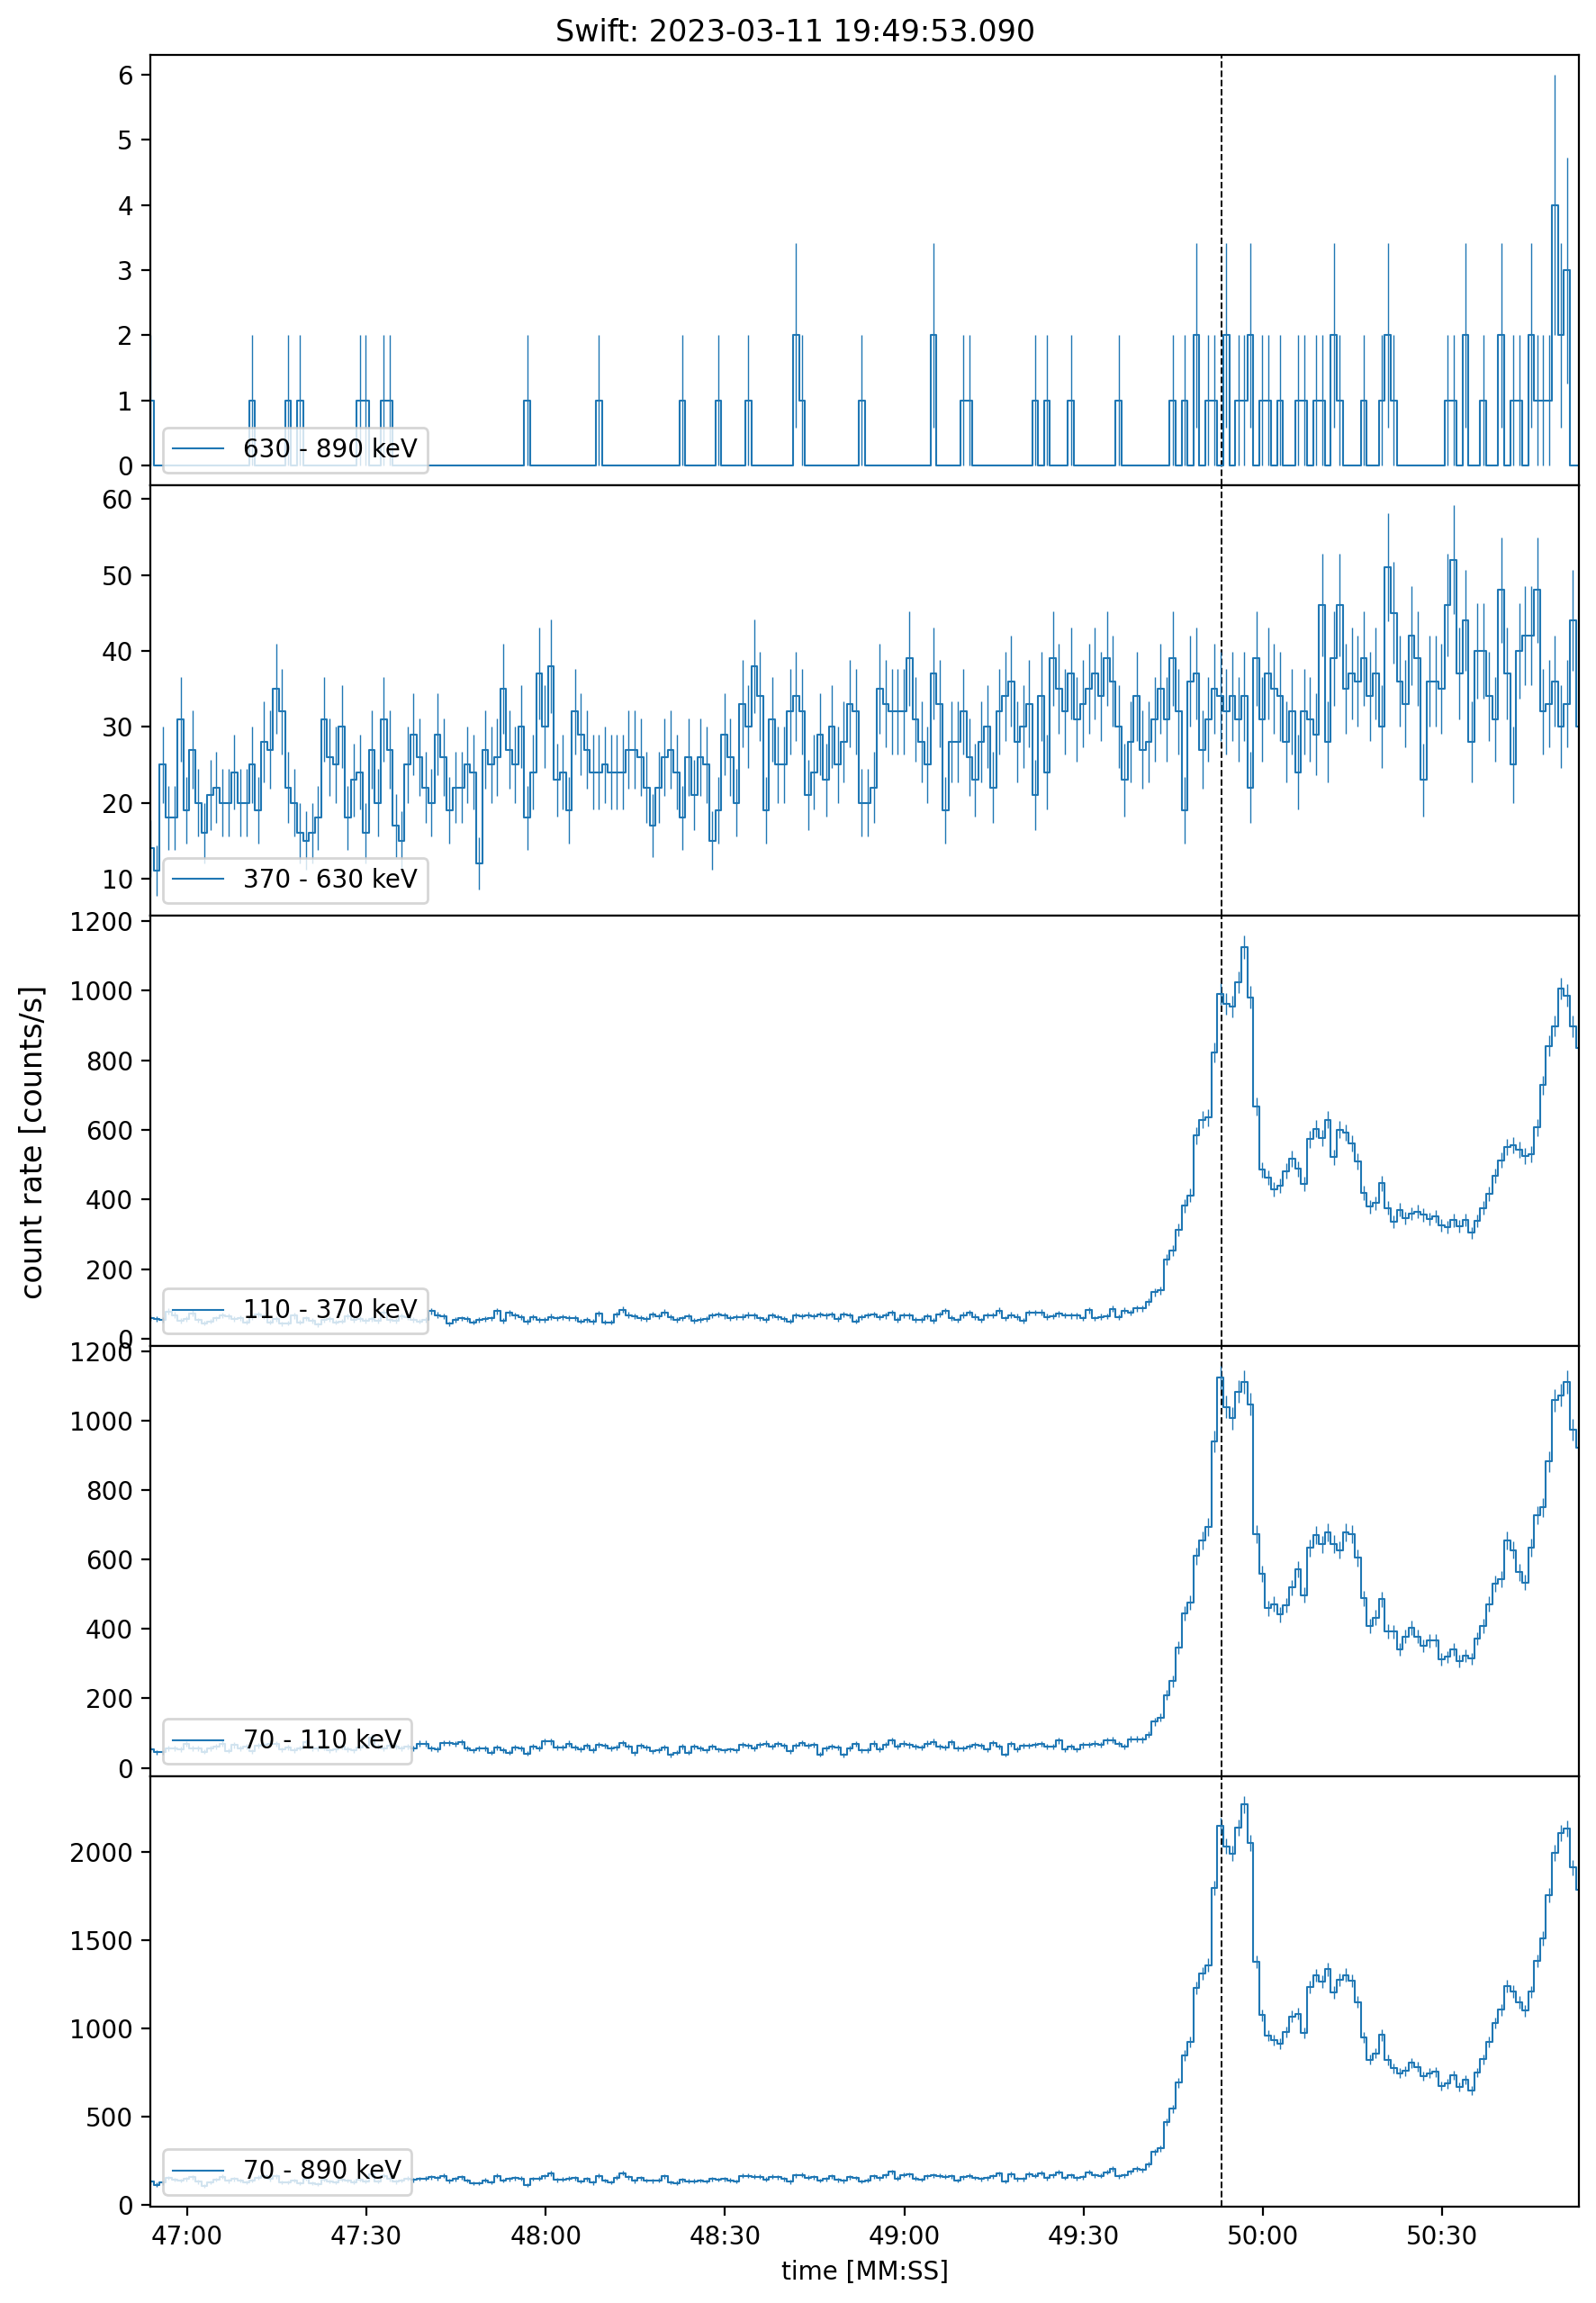

In [18]:
path = r"C:\Users\maria\Desktop\CubeSats\GRBs\files\r23c11b_209536.json"
time = '2023-03-11 19:49:53.090'

event_type = 'Swift'

obs = Observation(path)
obs.check_event(time,event_type,llim=59,rlim=99,dtvalue_left=3,dtvalue_right=1
                # ,save_path="C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\"
                ,second_locator=[0,30]
                # ,fit_function='polynom'
                ,plot_fit=False
                )
# ra = 244.9794583333
# dec = -15.6402222
# obs.skymap(time,event_type,ra,dec,save_path="C:\\Users\\maria\\Desktop\\CubeSats\\GRBs\\analysis\\")

In [8]:
time = '2023-03-11 19:50:00'
obs.longitude[time],obs.latitude[time]

(utc
 2023-03-11 19:50:00.878    39.2958
 Name: lon, dtype: float64,
 utc
 2023-03-11 19:50:00.878   -27.7285
 Name: lat, dtype: float64)

GRB at 2023-03-10 00:45:01.130 in FoV: True
GRB at 2023-03-10 00:45:01.130 in FoV: True


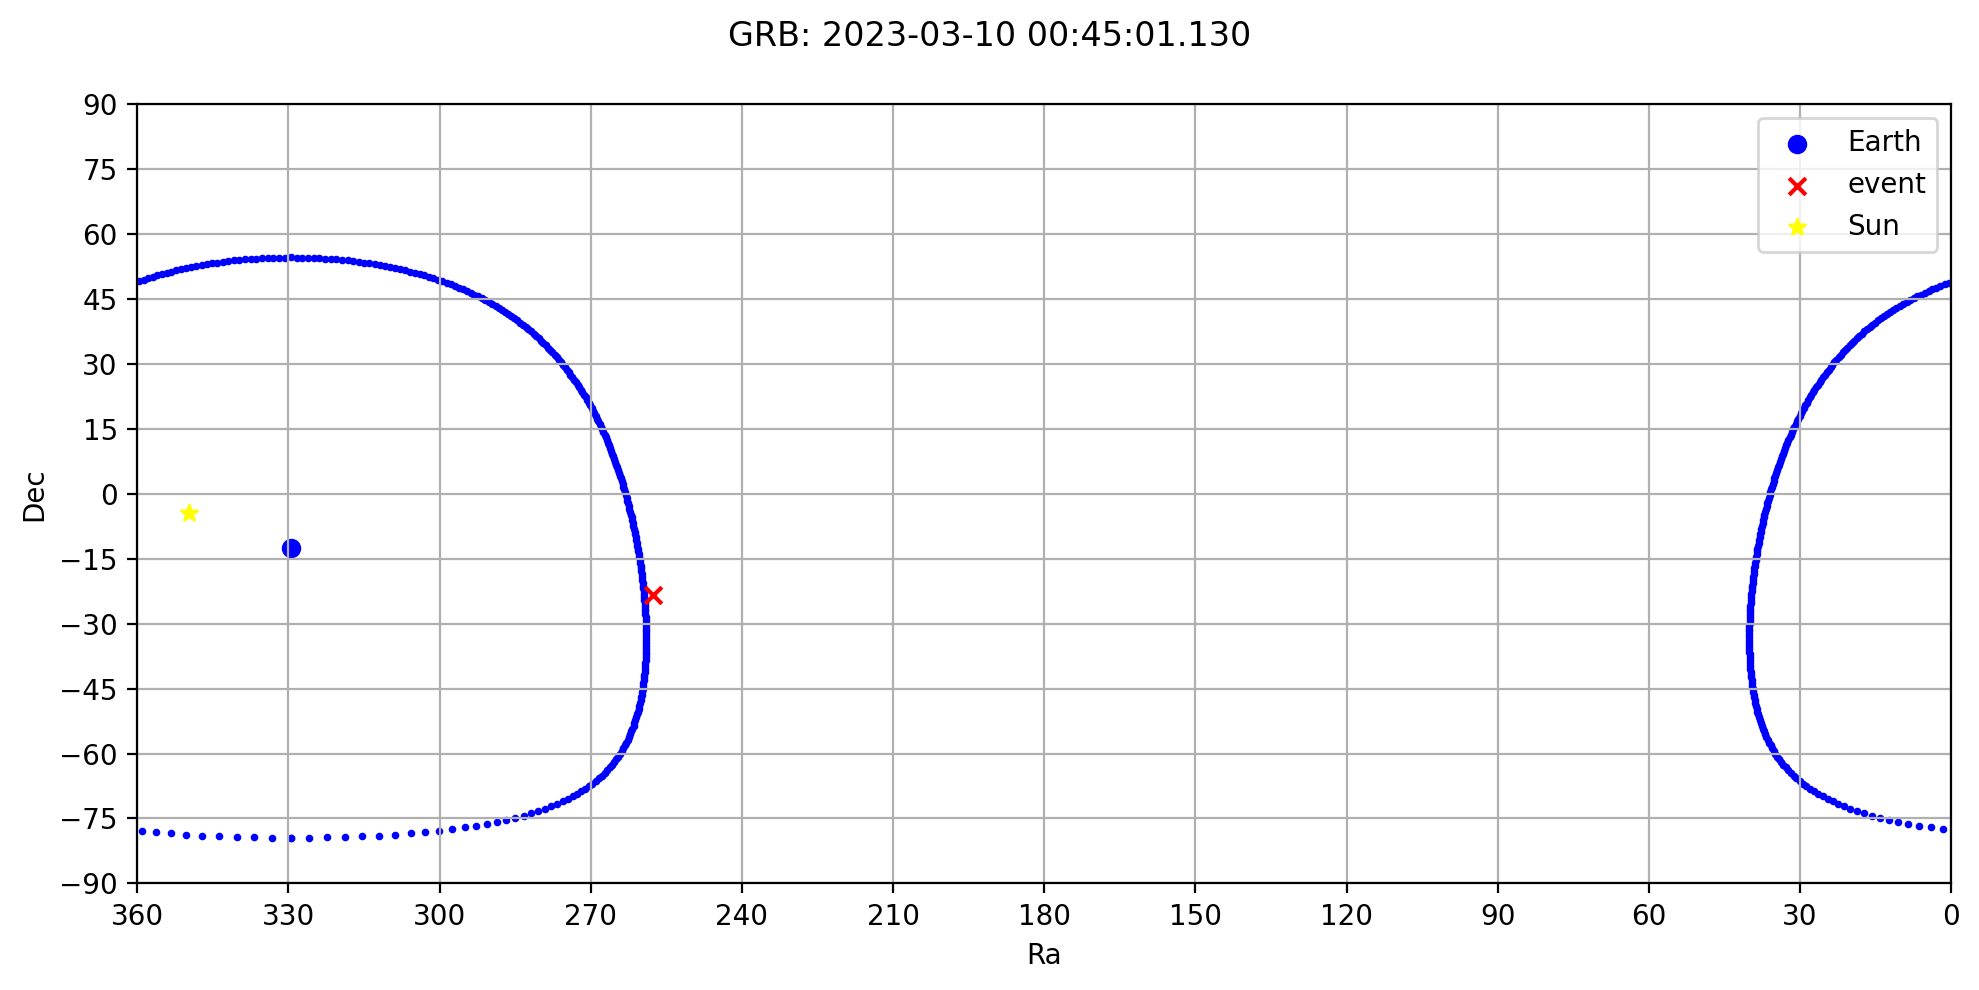

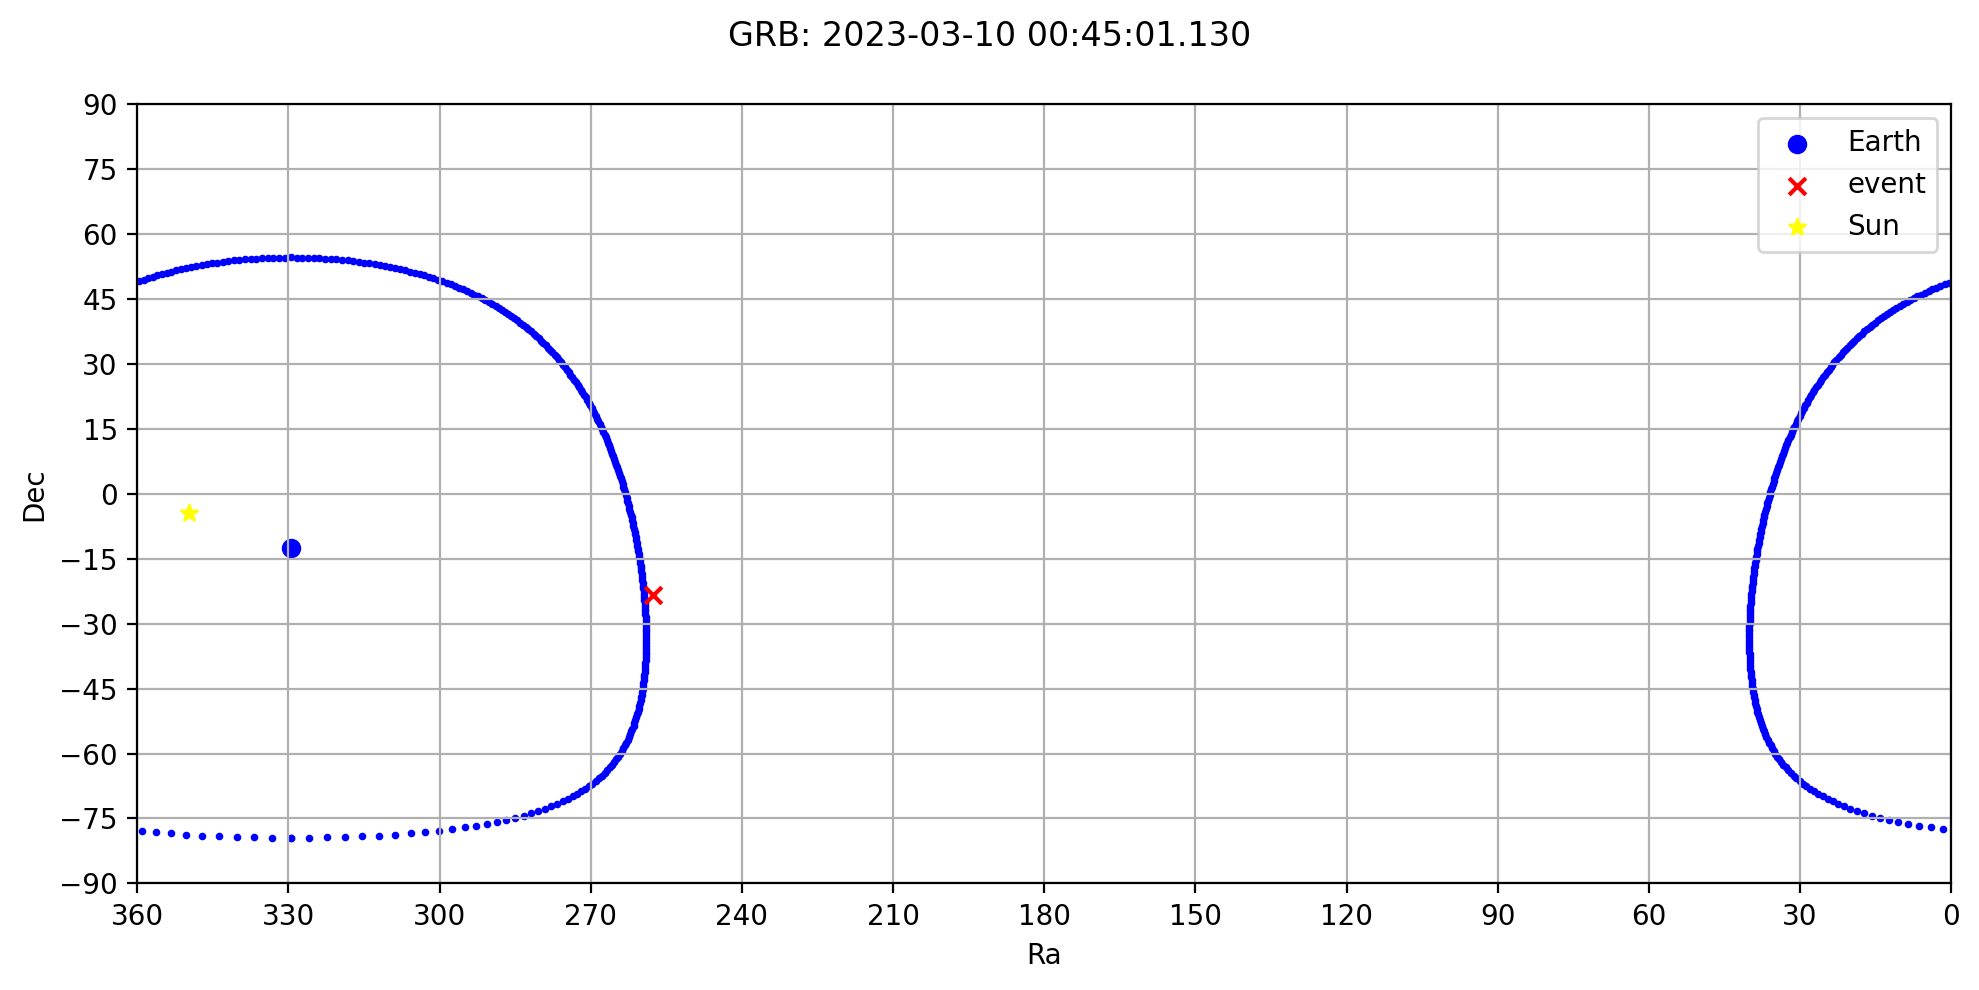

In [9]:
from src.tools import Event
Event(time=time,event_type='GRB',ra=ra,dec=dec).in_fov(-28.84,12.46,map=True)
Event(time=time,event_type='GRB',ra=ra,dec=dec).in_fov(360-28.84,12.46,map=True)

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:50: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(filepath,skiprows=8,sep='\s+\s+')
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:52: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  self.exp_time = pd.read_csv(filepath,skiprows=8,sep='\s+\s+',usecols=['exposure(s)'])['exposure(s)'][0]
c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:53: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted a

statistics in 40-370 keV for a VZLUSAT2u0-GRB at 2023-01-26 18:20:44.450000:
peak time [utc]: 2023-01-26 18:20:46.500000
SNR at peak: 3.367
count rate [cnt/s] above background at peak: 43.513 +- 12.923
T90 [s]: 15
SNR in T90: 5.345
counts above background in T90: 259.779 +- 48.6

statistics in 40-890 keV for a VZLUSAT2u0-GRB at 2023-01-26 18:20:44.450000:
peak time [utc]: 2023-01-26 18:20:46.500000
SNR at peak: 2.837
count rate [cnt/s] above background at peak: 40.224 +- 14.177
T90 [s]: 15
SNR in T90: 4.79
counts above background in T90: 262.552 +- 54.809



c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:292: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  return # file with values


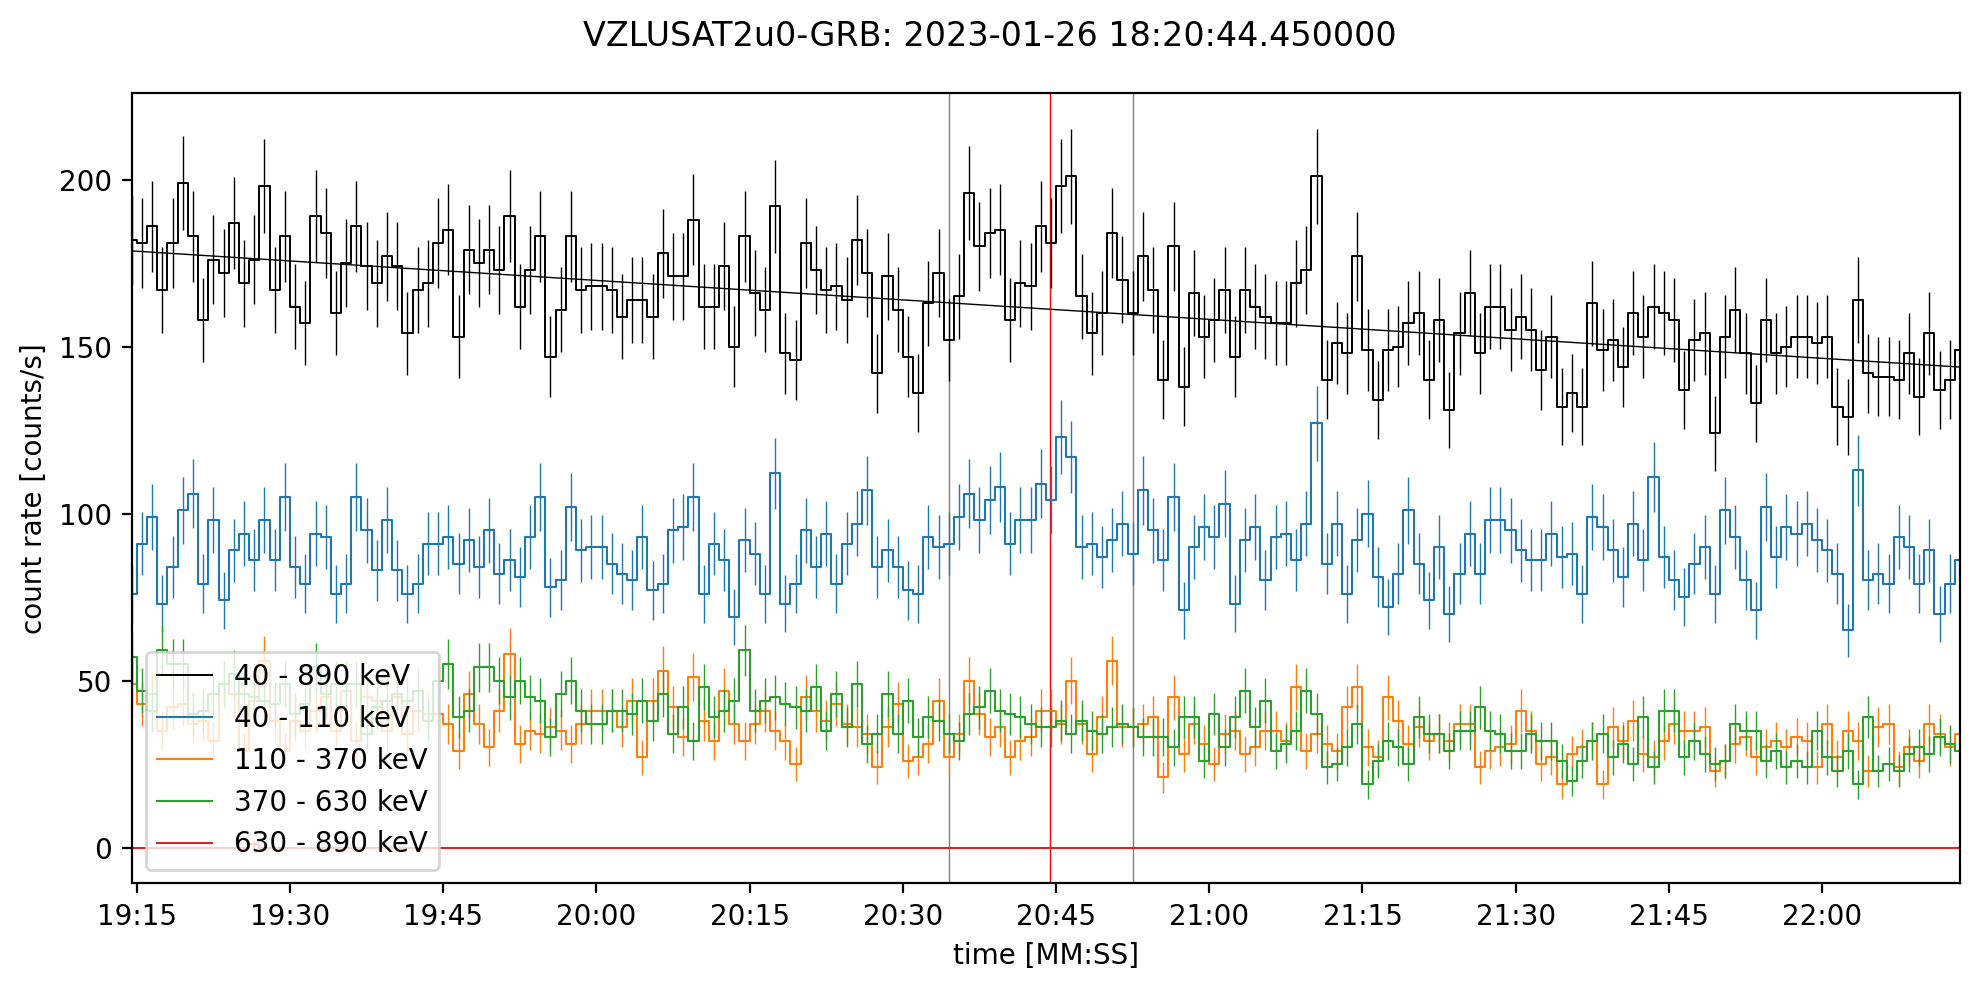

In [66]:
path = r'C:\Users\maria\Desktop\CubeSats\vzlusat2\grbs\GRB230126A_unit0.txt'
event_type = 'VZLUSAT2u0-GRB'

obs = Observation(path)
time = '2023-01-26 18:20:44.450' #obs.is_GRB_in_file()[0][0]
obs.check_event(time,event_type,llim=81,rlim=98,dtvalue_left=1.5,dtvalue_right=1.5)#,fit_function='polynom')#,second_locator=[0,30])#,fit_function='polynom')


In [52]:
time = '2023-01-14 20:43:00'
obs.longitude[time],obs.latitude[time]

(exp_end_time
 2023-01-14 20:43:00.500    52.64
 dtype: float64,
 exp_end_time
 2023-01-14 20:43:00.500   -77.173
 dtype: float64)

c:\Users\maria\Desktop\CubeSats\grbalpha-tools\src\tools.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Sun at 2023-03-04 02:24:58.480 in FoV: True
GRB at 2023-03-01 06:40:10.890 in FoV: True


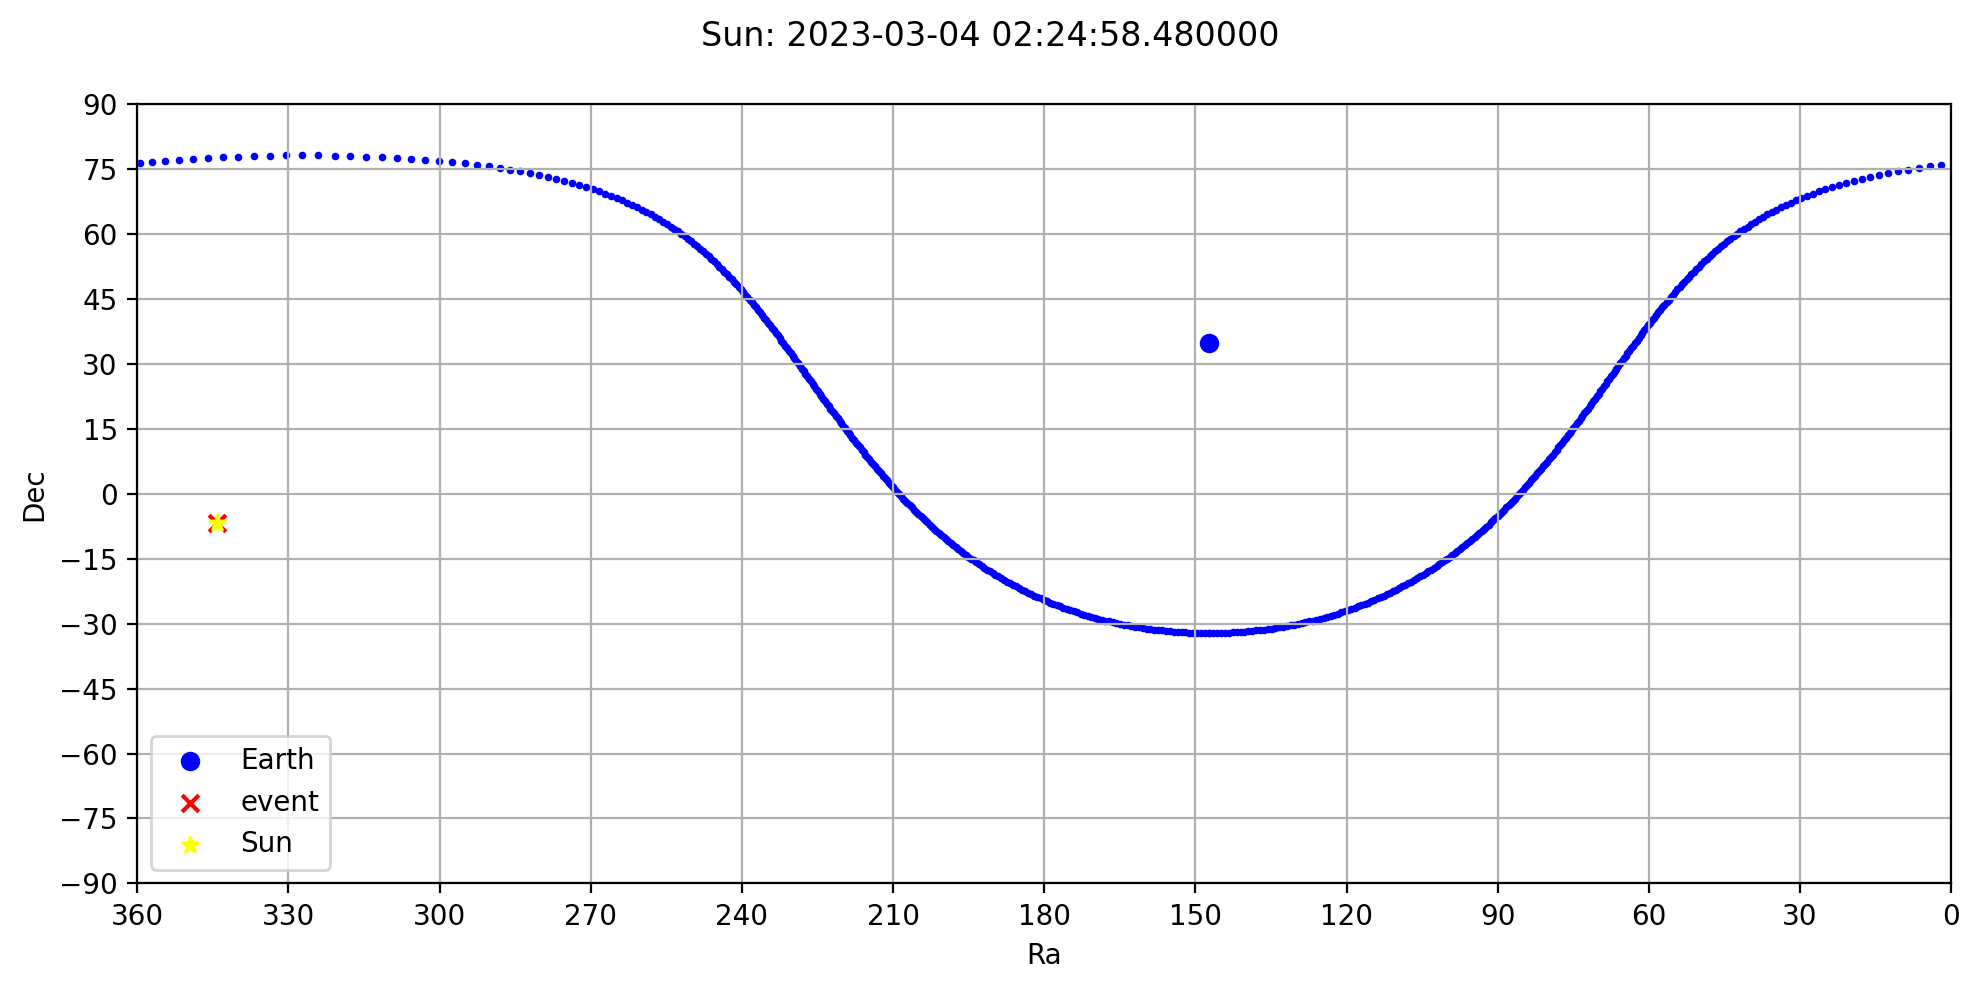

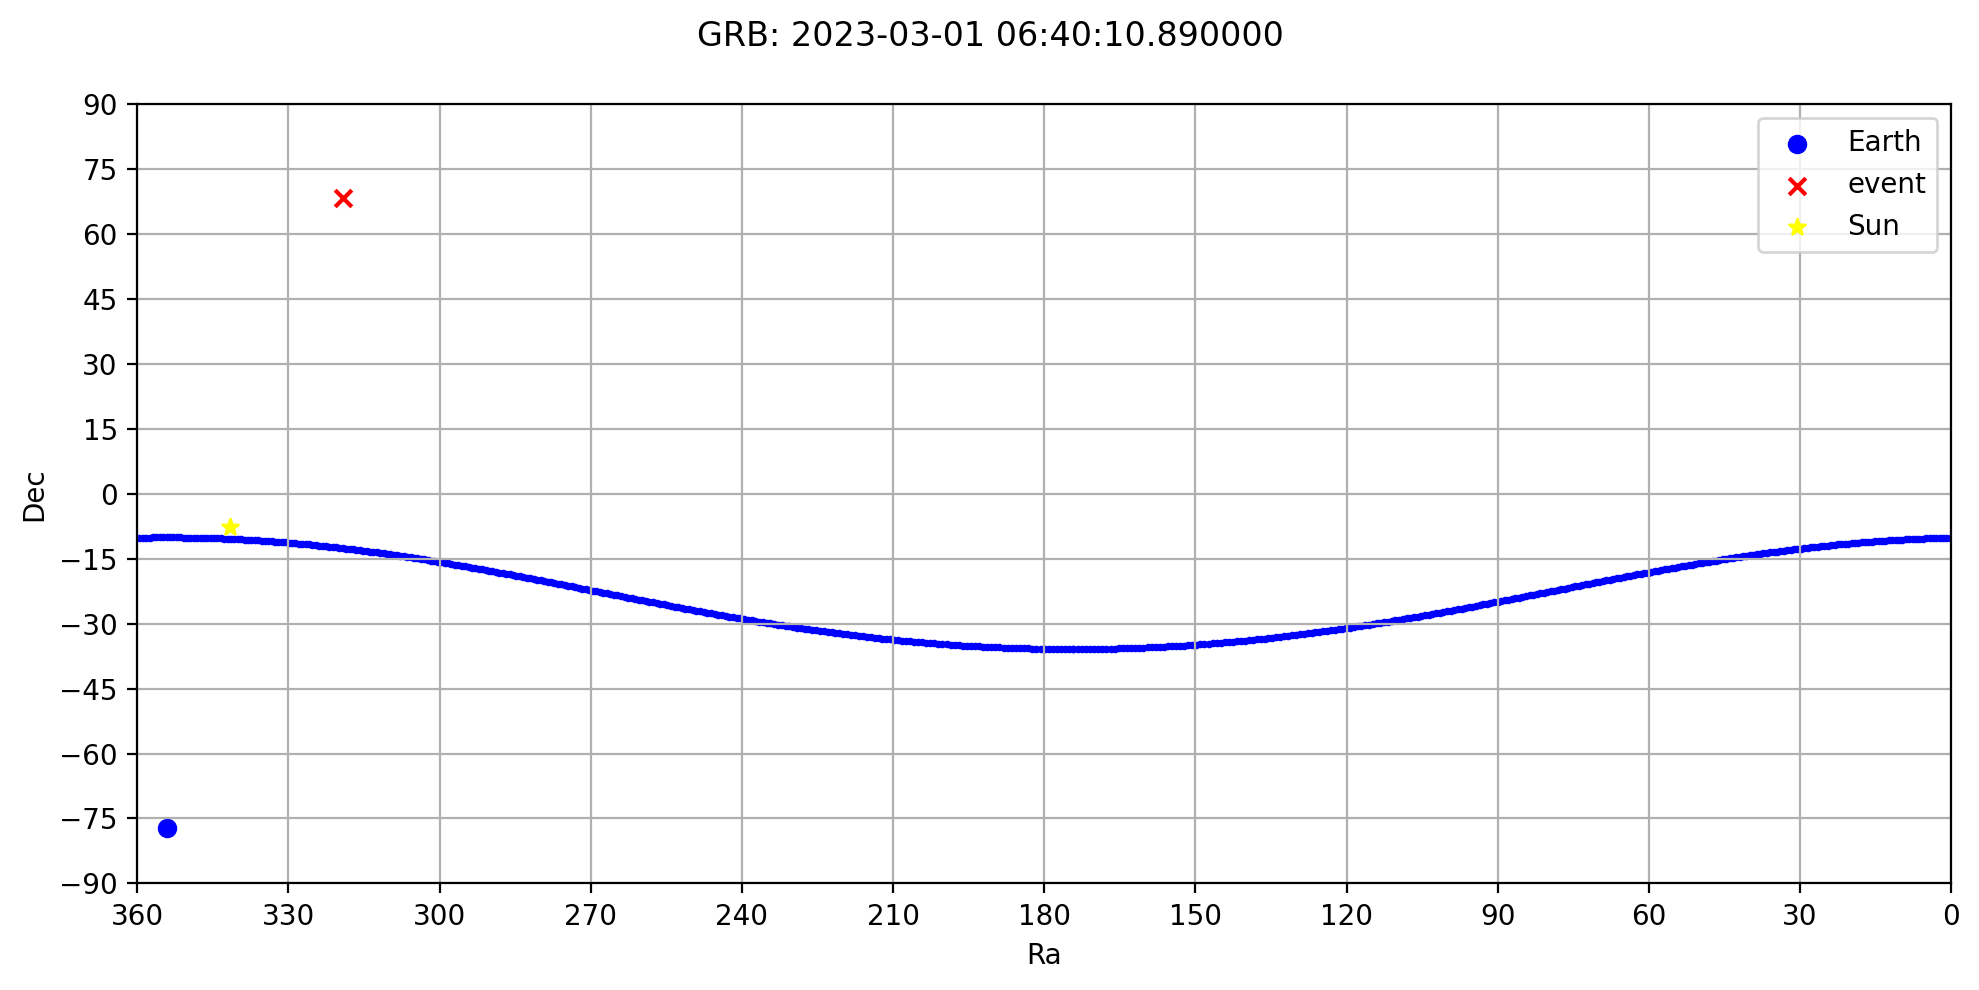

In [4]:
from src.tools import Event
Event('2023-03-04 02:24:58.480','Sun').in_fov(129.77,-34.86,map=True)
Event('2023-03-01 06:40:10.890','GRB',319.140,68.30).in_fov(360-84.29,77.11,map=True)
